# 同花顺行业概念信息

In [1]:

import pandas as pd

fpath = r'../../JohnsonUtil\wencai\同花顺板块行业.xls'
thsgn = pd.read_excel(fpath)
thsgn = thsgn.set_index('股票代码')

## 查询信息

In [2]:
thsgn[:1]
thsgn.columns
thsgn.loc['002670.SZ']

股票简称                                                                 国盛金控
现价(元)                                                                9.46
涨跌幅(%)                                                               0.96
主营产品名称                  电源输入组件||电热电器电源输入组件||冰洗电器电源输入组件||空调电源输入组件||空调连接...
所属概念                    深股通;区块链;转融券标的;富时罗素概念;富时罗素概念股;消费金融;标普道琼斯A股;融资融券...
所属同花顺行业                                                       非银金融-证券-证券Ⅲ
经营范围                    控股公司服务，股权投资，投资管理与咨询；金融信息服务；科技中介服务，技术推广服务，软件开发，...
公司网站                                                       www.gsfins.com
所属概念数量(个)                                                              11
a股流通市值 (元)2023.01.31                                          15356897000
Name: 002670.SZ, dtype: object

# Debug开启

In [3]:

# Delete Jupyter notebook root logger handler
# Set Debug
import logging
import sys

# %matplotlib inline
%matplotlib widget
# stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# # # reload(sys)
# # # sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# stdout = sys.stdout
# sys.path.append('../')
# import JSONData.tdx_data_Day as tdd
# sys.stdout = stdout


mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print("handlers:%s std:%s" % (ix.stream, sys.stdout))
else:
    print("nb not handlers")
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
# mylogger.setLevel(logging.DEBUG)

print("nb:", sys.stderr)
# # Create logger as usual
import nest_asyncio

nest_asyncio.apply()

nb not handlers
nb: <ipykernel.iostream.OutStream object at 0x000001BDD66F3490>


# TDX多日数据分析

## 定义 TDX-Path

In [4]:
# encoding:utf-8
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

import sys

import pandas as pd
from pandas import HDFStore

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# print(stdi, stdo, stde)
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# print(sys.stdout,sys.stderr,sys.stderr)

# print(stdi, stdo, stde)

# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

In [5]:
sys.path.append("../../")
import JSONData.tdx_data_Day as tdd
# import win_unicode_console
from JohnsonUtil import commonTips as cct
from JSONData import sina_data

# import nest_asyncio
# nest_asyncio.apply()
# 查阅资料后发现，发现使用 jupyter notebook 环境，其连接着 IPython 内核，而 IPython 内核本身在事件循环上运行，而 asyncio 不允许嵌套其事件​​循环，因此会出现如上图的错误信息。
# nest_asyncio 作为异步操作的补丁而存在，具体内容请参考
# win_unicode_console.disable()
tdx_path = "G:\\tdx_last_df.h5"
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
sina_d_path = "G:\\sina_data.h5"
sina_dd_path = "G:\\get_sina_all_dd.h5"
# print(stdi, stdo, stde)
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# # 显示所有列
pd.set_option("display.max_columns", None)
# # 显示所有行
# pd.set_option('display.max_rows', None)
# # 设置 value 的显示长度为 100，默认为 50
# pd.set_option('max_colwidth',100)
# pd.set_option?
# df.columns.tolist()

In [6]:
cct.code_to_symbol_ths('000002')

'000002.SZ'

## 功能定义

In [7]:
def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    store.close()
    return df


def write_code_to_blk(codew, blk='090'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 10:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))


def compute_perd_value(df, market_value=3, col="per"):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col))
                & (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df


from collections import Counter, OrderedDict


def counterCategory(df):
    top5 = dict()
    if len(df) > 0:
        categoryl = df.category[:20].tolist()
        dicSort = []
        for i in categoryl:
            if isinstance(i, str):
                # dicSort.extend([ co.decode('utf8') for co in i.split(';')])
                dicSort.extend(i.split(';'))
                # cate_list = i.split(';')
                # for co in cate_list:
                #     dicSort.append(to_str(co))
        topSort = Counter(dicSort)
        top5 = OrderedDict(topSort.most_common(5))
        # for i in top5.keys():
        # print(i, top5[i]),
        # print('')
    return top5


def get_runtime_percent(df, perd=None):
    if "percent" not in df.columns and "lastp1d" in df.columns:
        # print('init percent')
        df['percent'] = list(
            map(
                lambda x, y, z: round((x - y) / y * 100, 1)
                if x != y else round((x - z) / z * 100, 1),
                df.close, df.lastp1d, df.lastp2d))
        # df['percent'] = df.apply(lambda x: round((x.close - x.lastp1d) /(x.lastp1d) * 100, 1),axis=1)
    # else:
    #     print('Percent in columns')
    if not perd is None:
        df[perd] = list(map(lambda x, y: round((x + y), 1)
                            if int(y) > 0 else 0, df.perd, df.percent))
    return df

## 还原Cell输出信息

In [8]:
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

## 初始化 hdf5的tdx数据

In [9]:

market_value = "3"
df = readHdf5(tdx_path)
df = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
df = compute_perd_value(df, market_value, "perc")
df = compute_perd_value(df, market_value, "per")


# df=get_runtime_percent(df)

df = get_runtime_percent(df, "per%sd" % (market_value))

# filter 科创
df = clean_688(df)

df.shape
df[-1:].percent
df[~(df.last6vol > 0)][:10].last6vol

['/low_d_60_y_all', '/low_w_180_y_all']


(4405, 111)

code
300071    3.8
Name: percent, dtype: float64

Series([], Name: last6vol, dtype: float64)

## 个股数据查看

In [10]:
df.loc[["603068", '601377', '000725'],
       ["date", "name", "category", "percent", "close", "lastp1d", "ma5d",
        "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
        "ra", "ral", "vcall", "vcra", "vchange", "lvol", 'lv', 'lowvol',
        'last6vol', 'per%sd' % (market_value),
        'perc%sd' % (market_value),
        'perc4d']][: 3]

,date,name,category,percent,close,lastp1d,ma5d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,
603068,2022-10-31,博通集成,新股与次新股,-3.4,31.10,32.19,31.85,29.8,29.70,60.0,7.0,6.0,1.1,34.56,28.00,0.0,-10.3,430.4,2.0,27.2,4938314.0,1506600.0,2658857.0,1877615.0,0.0,3.1,1.0
601377,2022-10-31,兴业证券,参股新三板;MSCI概念;融资,0.4,6.90,6.87,6.91,6.5,6.21,60.0,9.0,6.0,-1.3,6.05,6.04,0.0,-2.3,373.1,5.0,14.4,116624072.0,21547268.0,42019141.0,87145672.0,0.0,3.1,1.0
000725,2022-10-31,京东方Ａ,国开行;物联网;OLED,-2.5,3.98,4.08,4.00,3.8,3.67,60.0,8.0,4.0,1.2,3.68,3.63,0.0,-0.7,165.0,3.0,27.5,562858552.0,90156798.0,490244320.0,330606243.0,0.0,3.1,1.0


In [11]:

sort_key2 = "per%sd" % (market_value)
df = df.sort_values(
    by=["perc%sd" % (market_value), sort_key2, "fib"], ascending=[0, 0, 1]
)
df.loc[:,
       ["name", "category", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
        "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
        (market_value),
        "perc%sd" % (market_value),
        sort_key2, ], ][: 5]

df.loc[:,
       ["name", "category", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
        "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
        (market_value),
        "perc%sd" % (market_value),
        sort_key2, ], ][-5:]
# df = df.sort_values(by=['perc%sd'%(market_value), 'per%sd'%(market_value),'fib'],ascending=[0,0,1])

,name,category,close,percent,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d
code,,,,,,,,,,,,,,,,,,
300044,赛为智能,人脸识别;在线教育;绿色建筑,4.54,20.1,3.78,2.9,2.97,17.0,7.0,2.0,10.0,3.74,2.85,0.0,-1.8,30.1,3.3,30.1
300159,ST新研,新疆自贸区;一号文件;深股通,3.02,19.8,2.52,2.3,2.30,60.0,9.0,0.0,4.1,2.58,2.19,0.0,-4.9,23.9,3.3,23.9
002808,恒久科技,,15.82,10.0,14.38,9.1,8.75,18.0,8.0,8.0,10.0,8.80,7.58,0.0,10.0,20.0,3.3,20.0
002835,同为股份,安防 ;人民币贬值受益,14.77,10.0,13.43,10.9,10.93,21.0,9.0,2.0,10.0,12.85,10.60,0.0,0.8,20.0,3.3,20.0
002877,智能自控,高送转;新股与次新股,8.83,10.0,8.03,7.1,7.07,21.0,9.0,2.0,10.0,7.98,6.96,0.0,-3.5,20.0,3.3,20.0


,name,category,close,percent,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d
code,,,,,,,,,,,,,,,,,,
600599,ST熊猫,众筹概念;春节概念;互联网金融,13.49,3.2,13.07,13.9,14.23,60.0,7.0,17.0,-2.1,15.80,13.06,2.0,-20.8,1.1,-2.2,1.1
600139,*ST西源,锂电池;锂矿;成渝特区,0.95,-5.0,1.00,1.2,1.19,2.0,1.0,1.0,-4.8,2.27,1.03,10.0,-57.4,0.0,-2.2,0.0
603777,来伊份,休闲零食;沪股通;商品新零售,17.87,-3.1,18.45,21.5,21.20,60.0,2.0,14.0,1.5,24.07,18.08,6.0,-28.8,0.0,-2.2,0.0
002499,*ST科林,江苏污水处理;光伏概念;废气处,1.68,5.0,1.60,2.1,2.45,2.0,1.0,0.0,-4.8,4.34,1.68,10.0,-64.0,0.2,-3.3,0.2
002089,*ST新海,云服务;军民融合;华为概念,1.65,-5.2,1.74,2.1,2.10,2.0,1.0,2.0,-4.9,2.56,1.83,9.0,-34.6,0.0,-3.3,0.0


## filter 20D 涨幅榜 

In [12]:
# df = df[(df['close'] > df['ma20d'] * 0.98) & (df['close'] < df['ma20d'] * 1.03)]
f20df = df[(df['close'] > df['ma20d'] * 0.98) &
           (df['df2'] > 0) & (df['lastp1d'] > df['ma5d']) & (df['lasth1d'] >= df['lasth2d']) ]

f20df.shape
f20df.loc[:, ["date", "name", "category", "close", "lastp1d", "ma5dcum", "ma20d",
              "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "vcall",
              "vcra", "vchange", "lvol", 'lv', 'lowvol', 'last6vol', 'per%sd' %
              (market_value),
              'perc%sd' % (market_value),
              'perc4d']][: 3]
f20df.loc[:, ["date", "name", "category", "close", "lastp1d", "ma5dcum", "ma20d",
              "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "vcall",
              "vcra", "vchange", "lvol", 'lv', 'lowvol', 'last6vol', 'per%sd' %
              (market_value),
              'perc%sd' % (market_value),
              'perc4d']][-3:]

(1314, 111)

,date,name,category,close,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,
300044,2022-12-29,赛为智能,人脸识别;在线教育;绿色建筑,4.54,3.78,2.9,2.97,17.0,7.0,2.0,10.0,3.74,2.85,0.0,-1.8,363.2,3.0,64.0,125733342.0,10853100.0,12304050.0,12230880.0,30.1,3.3,1.0
002808,2022-12-29,恒久科技,,15.82,14.38,9.1,8.75,18.0,8.0,8.0,10.0,8.80,7.58,0.0,10.0,2348.7,6.0,-95.4,3705000.0,2131400.0,3308800.0,2131400.0,20.0,3.3,1.1
002835,2022-12-29,同为股份,安防 ;人民币贬值受益,14.77,13.43,10.9,10.93,21.0,9.0,2.0,10.0,12.85,10.60,0.0,0.8,438.6,2.0,-69.6,3758481.0,1082509.0,1082509.0,1897800.0,20.0,3.3,1.1


,date,name,category,close,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,
605589,2022-10-31,圣泉集团,光刻胶 ;新材料概念 ;石墨烯,22.79,22.64,22.3,22.16,60.0,3.0,8.0,4.4,24.59,21.34,0.0,-9.3,245.8,5.0,106.3,10584505.0,2830057.0,7068715.0,2830057.0,0.0,0.0,0.0
002520,2022-11-25,日发精机,军民融合;机器人概念;工业4.,8.09,7.80,7.5,7.43,59.0,2.0,10.0,7.4,7.60,7.18,0.0,-1.8,168.3,7.0,125.1,104222041.0,17001650.0,17001650.0,36041100.0,11.1,-0.1,1.0
603348,2023-01-04,文灿股份,特斯拉;新股与次新股,63.63,63.46,65.1,62.59,21.0,2.0,2.0,10.0,78.70,56.53,4.0,-20.2,188.0,5.0,15.7,11825897.0,1639610.0,4628899.0,2353709.0,0.0,-1.1,1.0


In [13]:

sort_key2 = "per%sd" % (market_value)

f20df = f20df.sort_values(
    by=[sort_key2, "perc%sd" % (market_value), "fib"], ascending=[0, 0, 1]
)
f20df.shape
f20df.loc[:,
          ["name", "category", "close", "percent", "lastp1d", "ma5dcum", "ma20d",
           "fib", "fibl", "df2", "per1d", "hmax", "lmin", "per%sd" %
           (market_value),
              "perc%sd" % (market_value),
              sort_key2, ], ][: 5]

f20df.loc[:,
          ["name", "category", "close", "percent", "lastp1d", "ma5dcum", "ma20d",
           "fib", "fibl", "df2", "per1d", "hmax", "lmin", "per%sd" %
           (market_value),
              "perc%sd" % (market_value),
              sort_key2, ], ][-5:]


# df.loc[:, ["name"]].T

(1314, 111)

,name,category,close,percent,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d,per3d
code,,,,,,,,,,,,,,,,
300044,赛为智能,人脸识别;在线教育;绿色建筑,4.54,20.1,3.78,2.9,2.97,17.0,7.0,2.0,10.0,3.74,2.85,30.1,3.3,30.1
002808,恒久科技,,15.82,10.0,14.38,9.1,8.75,18.0,8.0,8.0,10.0,8.80,7.58,20.0,3.3,20.0
002835,同为股份,安防 ;人民币贬值受益,14.77,10.0,13.43,10.9,10.93,21.0,9.0,2.0,10.0,12.85,10.60,20.0,3.3,20.0
002877,智能自控,高送转;新股与次新股,8.83,10.0,8.03,7.1,7.07,21.0,9.0,2.0,10.0,7.98,6.96,20.0,3.3,20.0
002253,川大智胜,人工智能;全息手机;车联网,15.57,10.0,14.15,12.5,12.41,17.0,7.0,1.0,10.0,16.07,12.11,20.0,3.2,20.0


,name,category,close,percent,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d,per3d
code,,,,,,,,,,,,,,,,
600583,海油工程,一带一路;高端装备;央企整合,6.65,1.1,6.58,6.3,6.25,60.0,9.0,2.0,-2.2,6.34,6.00,-1.1,3.1,-1.1
002150,通润装备,壳资源;贸易战影响股,26.13,2.6,25.48,26.3,24.17,60.0,4.0,26.0,-3.7,26.65,23.23,-1.1,2.1,-1.1
603979,金诚信,磷化工,29.50,1.2,29.16,27.8,26.94,60.0,9.0,10.0,-2.8,29.01,26.51,-1.6,3.2,-1.6
000737,北方铜业,新材料概念;壳资源;碳纳米管,6.29,1.3,6.21,6.0,5.67,60.0,9.0,10.0,-3.1,5.91,5.57,-1.8,3.1,-1.8
000923,河钢资源,雄安基建;涉矿;雄安新区,14.93,1.6,14.69,14.0,13.62,60.0,9.0,13.0,-3.6,13.86,13.03,-2.0,3.1,-2.0


In [14]:
code = ["000725"]
f20df.loc[code,
          ["name", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
           "fibl", "ra", "df2", "per1d", "hmax", "lmin", "per%sd" %
           (market_value),
              "perc%sd" % (market_value)]]

,name,close,percent,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,
000725,京东方Ａ,3.98,-2.5,4.08,3.8,3.67,60.0,8.0,0.0,4.0,1.2,3.68,3.63,0.0,3.1


## Write code to blk 

In [16]:


# codew = df.index.tolist()
# write_code_to_blk(codew)

# TDX参数数据信息

<AxesSubplot:xlabel='date'>

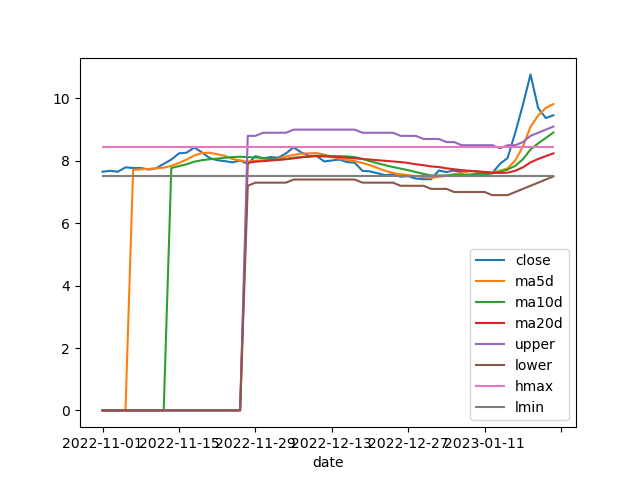

In [17]:
code = '002670'
tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
tdf.dropna(inplace=True)
tdf.loc[:, ["close", "ma5d", "ma10d",
            "ma20d", "upper", "lower", "hmax", "lmin"]].plot()
tdf = compute_perd_value(tdf, market_value, "per")

# 实时sina_MultiIndex 分析

## 初始化当日Multi

In [18]:
# ohlc_dict = {'open': 'first',
#              'high': 'max',
#              'low': 'min',
#              'close': 'last'}

ohlc_dict = {
    'volume': 'sum',
    'high': 'max',
    'low': 'min',
    'close': 'last'}


def minmax_norm(df):
    return ((df - df.min()) / (df.max() - df.min())).apply(lambda x: round(x, 2))

# def apply_round(df):
#     return df.apply(lambda x:round(x,2))


import pandas as pd
from pandas import HDFStore

# sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
# freq='30T'
# startime = '09:25:00'
# endtime = '15:01:00'
# def readHdf5(fpath, root=None):
#     store = pd.HDFStore(fpath, "r")
#     print((store.keys()))
#     if root is None:
#         root = list(store.keys())[0].replace("/", "")
#     df = store[root]
#     store.close()
#     return df

h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
h5.loc[code_muti][:2]
h5.loc[code_muti][-1:]

['/all_10']
G:\sina_MultiIndex_data.h5


(1505047, 6)

,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-01-31 09:54:10,1897.88,1899.95,1880.5,1888.0,518737,1897.88
2023-01-31 09:54:46,1896.80,1899.95,1880.5,1888.0,521637,1897.88


,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-01-31 15:00:01,1845.76,1899.95,1833.07,1888.0,3299068,1840.13


## Now freq = 'D' Vol 占比

In [19]:
# h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
# h5_ohlc_Day = h5_ohlc.groupby(pd.Grouper(
#     freq='1D', closed='right', label='right')).agg(
#     ohlc_dict).dropna()
# freq = '30T'
freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()

run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf.loc['002195'].volume / mdf.loc['600705'].volume
ndf = mdf.copy()
ndf.info(show_counts=True)
ndf.describe()

14979.007348205

ticktime
2023-02-01    1.879623
Freq: D, Name: volume, dtype: float64

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4938 entries, ('000001', Timestamp('2023-02-01 00:00:00', freq='D')) to ('689009', Timestamp('2023-02-01 00:00:00', freq='D'))
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4938 non-null   float64
 1   volume  4938 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 259.4+ KB


,close,volume
count,4938.000000,4.938000e+03
mean,28.767524,3.033416e+09
std,213.612782,7.505340e+09
min,0.000000,0.000000e+00
25%,6.672552,4.197516e+08
50%,12.967023,1.152291e+09
75%,25.375113,3.027242e+09
max,12061.070333,2.634998e+11


### TDX filter Vol and fibl

In [25]:
df.shape
vdf = df[(df.lastv1d > df.lastv2d) & (df.lastv1d / df.lastv2d > 1.5)
         & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 1) & (df.df2 > 0) & (df.close > df.hmax) ]
vdf.shape
vdf[:3]


(4405, 111)

(101, 111)

,lopen,lhigh,llow,lastp,lvol,lamount,ma5d,ma10d,ma20d,upper,lower,ene,op,fib,ldate,topU,eneU,upperT,upperL,top0,topR,topD,ral,up5,perd,lastdu,perlastp,fibl,boll,df2,kdj,macd,rsi,ma,oph,rah,vchange,vcra,ma5vol,vcall,lasto1d,lasth1d,lastl1d,lastv1d,lastp1d,per1d,ma51d,ma201d,perc1d,lasto2d,lasth2d,lastl2d,lastv2d,lastp2d,per2d,ma52d,ma202d,perc2d,lastp3d,per3d,ma53d,ma203d,perc3d,lastp4d,per4d,ma54d,ma204d,perc4d,lastp5d,per5d,ma55d,ma205d,perc5d,lastp6d,per6d,ma56d,ma206d,perc6d,lastp7d,per7d,ma57d,ma207d,perc7d,lastp8d,per8d,ma58d,ma208d,perc8d,lastp9d,per9d,ma59d,ma209d,perc9d,top10,ma5dcum,ra,hmax,max5,lmin,min5,cmean,hv,lv,date,lowvol,last6vol,category,timel,close,name,percent
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300427,17.03,17.20,16.59,16.82,8192133.0,160392172.6,18.66,18.39,17.88,19.8,16.3,18.1,-101.0,16.0,2022-10-31,1.0,14.0,1.0,0.0,0.0,1.0,0.0,2.9,5.0,5.9,6.3,1.1,5.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,285.1,6.0,1419200.0,285.1,18.76,20.0,18.76,8192133.0,19.75,5.9,18.66,17.88,1.1,18.46,18.75,18.46,2127320.0,18.65,0.5,18.30,17.74,1.1,18.55,0.0,18.17,17.65,3.3,18.27,1.1,18.10,17.59,1.1,18.08,0.7,18.08,17.53,1.0,17.95,-0.3,18.11,17.48,1.0,18.00,-1.1,18.15,17.45,0.9,18.20,0.2,18.15,17.45,1.0,18.16,-0.5,18.06,17.44,1.0,0.0,18.2,0.0,18.91,18.25,17.81,17.81,18.39,7294600.0,921597.0,2022-12-30,1419200.0,2127320.0,智能电网;电力改革;能源互联网,1.675130e+09,19.53,红相股份,-1.1
300455,7.46,7.49,7.28,7.32,10387226.0,89941026.1,8.29,8.04,7.80,8.7,7.1,7.9,-101.0,21.0,2022-10-31,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.1,5.1,1.1,9.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56.4,3.0,2849500.0,155.1,8.52,8.9,8.46,10387226.0,8.68,3.1,8.29,7.80,1.1,8.25,8.57,8.17,6642361.0,8.42,2.1,8.16,7.73,1.1,8.25,0.0,8.04,7.68,3.3,8.11,1.2,7.95,7.64,1.1,8.01,0.0,7.85,7.61,1.0,8.01,2.4,7.80,7.59,1.1,7.82,0.5,7.75,7.57,1.0,7.78,2.1,7.72,7.57,1.0,7.62,-1.7,7.72,7.58,0.9,0.0,7.9,0.0,8.61,8.01,7.58,7.58,8.20,6642361.0,1371236.0,2022-12-22,2589864.0,2339722.0,高铁 ;高端装备 ;军工,1.675130e+09,8.65,康拓红外,-0.3
603882,67.96,69.30,67.20,67.40,4595353.0,413618293.0,86.28,84.33,79.80,88.6,72.6,80.6,-101.0,21.0,2022-10-31,8.0,14.0,8.0,3.0,0.0,0.0,0.0,4.5,5.0,4.9,7.1,1.1,7.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,122.8,5.0,1679230.0,148.4,88.56,92.5,86.04,4595353.0,90.94,4.9,86.28,79.80,1.1,86.25,87.00,84.60,2062537.0,86.66,0.6,84.99,78.74,1.1,86.14,0.0,84.28,77.78,3.3,83.50,-0.8,83.33,76.85,1.0,84.16,-0.4,82.95,76.08,1.0,84.48,1.7,82.37,75.36,1.1,83.10,2.1,81.23,74.68,1.1,81.43,-0.2,80.04,74.18,1.0,81.59,0.4,79.10,73.67,1.0,0.0,82.7,0.0,78.80,84.48,77.68,77.68,85.12,7442085.0,990200.0,2022-12-22,1353010.0,2062537.0,健康中国;医疗器械;冷链物流,1.675130e+09,84.10,金域医学,-7.5


In [ ]:
write_code_to_blk(vdf.index.tolist())

In [30]:

ndf['volume'] = ndf.volume.apply(lambda x: round(x / allvol * 100, 2))
# 交易量排序
ndf = ndf.sort_values(by=['volume'], ascending=[0])
ndf[:20]

,,close,volume
code,ticktime,,
002195,2023-02-01,3.055508,1.76
600705,2023-02-01,5.281053,0.94
000725,2023-02-01,3.978980,0.92
002031,2023-02-01,3.676033,0.65
603993,2023-02-01,5.680525,0.58
600795,2023-02-01,3.934820,0.58
601728,2023-02-01,4.957270,0.50
600157,2023-02-01,1.598548,0.50
600010,2023-02-01,2.028750,0.49


In [31]:
# 30M

In [23]:
h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
h5_ohlc['low'] = h5_ohlc['close']
# h5_ohlc['open'] = h5_ohlc['close']
h5_ohlc['high'] = h5_ohlc['close']

h5_ohlc_30M = h5_ohlc.groupby(pd.Grouper(
    freq='30Min', closed='right', label='right')).agg(
    ohlc_dict).dropna()
# h5_ohlc_30M['volume'] = h5_ohlc_30M['volume'].apply(lambda x:round(x/100100,1))
h5_ohlc_30M['volume'] = minmax_norm(h5_ohlc_30M['volume'])
h5_ohlc_30M

,volume,high,low,close
ticktime,,,,
2023-01-31 10:00:00,0.00,1897.88,1891.64,1891.64
2023-01-31 10:30:00,0.23,1889.66,1868.10,1868.10
2023-01-31 11:00:00,0.40,1868.99,1849.19,1850.61
2023-01-31 11:30:00,0.63,1849.00,1833.80,1844.20
2023-01-31 13:30:00,0.60,1843.26,1835.00,1839.97
2023-01-31 14:00:00,0.77,1846.87,1835.50,1844.23
2023-01-31 14:30:00,0.85,1846.70,1836.80,1842.72
2023-01-31 15:00:00,1.00,1846.88,1841.00,1846.88
2023-01-31 15:30:00,0.00,1845.76,1845.76,1845.76


# 当日Sina数据分析

In [18]:
tdf = readHdf5(tdx_path)
tdf = tdd.get_sina_datadf_cnamedf(tdf.index.tolist(), tdf)
# tdf[ (tdf.last6vol > 0)].shape
tdf = clean_688(tdf)
# tdf[ (tdf.last6vol > 0)].shape
# market_value = '5'

# 统计连续数据
for i in range(9, 1, -1):
    # print(i),
    tdf = compute_perd_value(tdf, i, "perc")
    tdf = compute_perd_value(tdf, i, "per")
    # tdf = get_runtime_percent(tdf,"per%sd"%(i))

tdf = get_runtime_percent(tdf)

tdf[(tdf.last6vol > 0)].shape
tdf.loc[:, ['percent', 'perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][:5]

['/low_d_60_y_all', '/low_w_180_y_all']


(4405, 111)

,percent,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,
159845,4.4,1.0,2.0,3.0,9.2,0.5,0.5,-0.5,3.6
510800,-9.0,1.1,1.1,1.0,1.8,1.5,1.5,0.0,-2.3
159922,3.7,1.1,2.1,3.1,9.3,0.8,0.6,0.3,3.3
159919,-0.6,1.1,2.2,3.2,9.4,0.5,1.2,1.0,4.1
510510,0.6,1.1,2.1,3.1,9.2,1.1,1.6,2.1,3.7


## Sina_Data

In [19]:
sina = sina_data.Sina()
dd = sina.all
if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    dd = dd[dd.close > 0]
else:
    dd = dd[dd.open > 0]

if 'percent' not in dd.columns:
    # print("compute percent")
    dd['percent'] = ((dd['close'] - dd['llastp']) / dd['llastp'] *
                     100).map(lambda x: round(x, 2))

# dd.shape
dd.loc[:, ['percent', 'close']][:1]
dd = clean_688(dd)
print(dd.shape)
if 'nclose' in dd.columns:
    for co in ['nclose']:
        dd[co] = dd[co].apply(lambda x: round(x, 2))

# df.shape
# h5 = readHdf5(sina_MultiD_path)
# h5.shape
# h5[:1]
# tdf['last6vol'][:2]

# dd=cct.combine_dataFrame(dd, df['last6vol'])
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)

,percent,close
code,,
600515,-2.11,4.63


(4388, 42)


### 设置周期时间

In [20]:
tdf.loc[:, ['perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][-5:]
# tdf = compute_perd_value(tdf, market_value, "perc")
# tdf = compute_perd_value(tdf, market_value, "per")

,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,
603300,1.0,2.1,3.2,9.3,0.2,1.0,2.4,5.4
002230,1.1,2.1,3.2,7.2,10.0,8.1,17.2,21.0
600418,1.1,2.2,3.1,8.9,4.5,13.4,12.1,5.6
000615,1.0,2.0,0.9,6.9,0.2,1.6,-3.5,-8.8
300071,1.1,2.2,1.2,0.9,2.9,6.9,2.8,4.2


In [21]:
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)
# dd.loc[:,['percent']][:1]
dd = cct.combine_dataFrame(
    dd, tdf, col=None, compare=None, append=False, clean=False)

dd.loc[:, ['percent']][:1]
dd[~(dd.last6vol > 0)].shape
# dd[:1]

,percent
code,
301398,-0.65


(11, 149)

In [22]:
dd_clean = dd[~(dd.last6vol > 0)]
display(dd_clean.shape, dd_clean.index.tolist()[:5])
dd = dd[(dd.last6vol > 0)]
dd.shape

(11, 149)

['301398', '001301', '601136', '301297', '301105']

(4377, 149)

In [23]:
# display(dd_clean.shape, dd_clean.index)
# adf = df.copy()
# %timeit -r 5 adf['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['ene'] = map(lambda x, y: round((x + y) / 2, 1), adf.upper, adf.lower)

### 计算Vol Ratio倍率

In [24]:
# store = pd.HDFStore(sina_MultiD_path, "r")
# (store.keys())
# store.close()
# dd.columns
# dd.loc[:, ['open', 'llastp', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low', 'volume', 'lastbuy','last6vol']][:1]
# dd.shape
time_ratio = cct.get_work_time_ratio()
time_ratio
dd['volra'] = list(map(lambda x, y: round((x / y), 1),
                       dd.volume / time_ratio, dd.last6vol))

dd.shape
dd[~(dd.volra > 0)].shape
dd.loc['301227', ['volra', 'vchange']]
# nldf.loc[:, ['close', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh',
#              'nhigh', 'low', 'volra', 'last6vol', 'volume', 'ticktime']][:2]

1.0

(4377, 150)

(0, 150)

volra        1.8
vchange    107.8
Name: 301227, dtype: object

### 突破左侧Hmax

In [25]:
# dz = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ((dd.close > dd.hmax))].copy()
# dz = dd[  ((dd.lastl2d > dd.hmax)) & (dd.lastl2d >= dd.ma52d) ].copy()
dz = dd[((dd.close > dd.max5)) & (dd.close >= dd.ma20d)].copy()

market_value = 2

sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)

# dz=get_runtime_percent(dz,"per%sd"%(market_value))
# 连阳排序
dz = dz.sort_values(
    by=[sort_key2, 'volra', sort_key1,
        "fib"],
    ascending=[0, 0, 0, 1])

dz.shape

dz.loc[:,
       ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close', 'max5',
        'lasth1d', 'hmax', 'lmin']][: 10].T

dz.loc[:,
       ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close', 'max5',
        'lasth1d', 'hmax', 'lmin']][-10:].T

(3072, 150)

code,002808,002848,002787,002380,002209,002290,002403,002401,300089,002195
name,恒久科技,高斯贝尔,华源控股,科远智慧,达 意 隆,禾盛新材,爱仕达,中远海科,*ST文化,二三四五
percent,10.0,5.2,-6.2,-10.0,10.0,-1.1,10.0,-1.3,4.1,4.7
volra,26.5,18.7,15.8,13.2,12.3,7.1,6.1,5.8,5.3,5.3
vchange,-95.4,56.9,242.9,295.0,-73.8,177.0,197.7,182.2,30.3,-57.5
perc2d,2.2,2.2,2.2,2.2,2.1,2.2,2.1,2.2,2.2,2.2
per2d,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
fib,18.0,7.0,16.0,21.0,21.0,60.0,60.0,60.0,3.0,18.0
fibl,8.0,7.0,9.0,4.0,9.0,9.0,9.0,4.0,3.0,4.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ral,10.0,5.6,10.0,10.0,2.7,-0.5,6.1,10.0,-49.1,-1.3


code,603117,301129,000636,000532,002737,002725,603383,601828,002961,002670
name,ST万林,瑞纳智能,风华高科,华金资本,葵花药业,跃岭股份,顶点软件,美凯龙,瑞达期货,国盛金控
percent,1.6,5.9,-0.2,0.4,3.5,-7.0,-7.6,3.9,-0.6,1.0
volra,2.1,3.6,0.7,2.3,2.8,15.8,1.7,30.6,1.4,1.9
vchange,337.8,0.4,-24.6,-35.3,19.9,50.4,-6.2,-38.7,-35.2,-5.9
perc2d,2.0,1.8,1.9,2.0,1.9,1.9,2.0,1.9,2.0,1.8
per2d,-3.9,-4.0,-4.2,-4.7,-4.9,-5.2,-5.2,-5.6,-9.7,-13.3
fib,60.0,21.0,60.0,60.0,19.0,21.0,22.0,59.0,15.0,60.0
fibl,7.0,7.0,8.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0
ra,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ral,-7.9,-9.9,-5.3,-4.8,-22.1,-5.6,-6.6,-13.1,-9.5,-13.0


In [30]:
code = '002209'
code_t = cct.code_to_symbol_ths(code)
thsgn.loc[code_t]

股票简称                                                                  达意隆
现价(元)                                                               12.14
涨跌幅(%)                                                               9.96
主营产品名称                  全自动pet瓶吹瓶机||二次包装设备||代加工||全自动高速pet瓶吹瓶机||吹瓶机||灌装...
所属概念                                       机器人概念;服务机器人;工业机器人;壳资源;消毒剂;智能制造
所属同花顺行业                                                  机械设备-专用设备-印刷包装机械
经营范围                    食品、酒、饮料及茶生产专用设备制造；包装专用设备制造；日用化工专用设备制造；塑料加工专用设备...
公司网站                                                     www.tech-long.cn
所属概念数量(个)                                                               6
a股流通市值 (元)2023.01.31                                           1875928400
Name: 002209.SZ, dtype: object

### 原始数据排序 放量 

In [27]:
df = dd.copy()

market_value = 3

sort_key2 = "per%sd" % (market_value)

# 连阳排序
df = df.sort_values(
    by=[sort_key2, 'volra', 'vchange', "perc%sd" % (market_value),
        "fib"],
    ascending=[0, 0, 0, 0, 1])

df.shape

(4377, 150)

#### filter per3d >5

In [28]:
df = df[(df[sort_key2] > 5)]
df.shape

(696, 150)

In [29]:


# df = df[df.volra > 1.2]
# df = df[(df.volra > 1.5) & (df.volra < 5)]

display("KEY: perc%s %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])

df.loc[:, ['volra', 'perc%sd' % (market_value), sort_key2]][:2]
df.shape
df.loc[:,
       ["name", "category", 'percent', 'close', 'llastp', 'open',
        'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
        'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax",
        "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']][: 5]

df.loc[:,
       ["name", "category", 'percent', 'close', 'llastp', 'open',
        'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
        'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax",
        "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']][-5:]

# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

# '600536'  in df.index

'KEY: perc3 per3d ,(696, 150)'

,volra,perc3d,per3d
code,,,
002808,26.5,3.3,30.0
002848,18.7,3.3,30.0


(696, 150)

,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002808,恒久科技,,10.0,15.82,14.38,15.36,15.30,15.30,15.82,15.82,15.30,26.5,-95.4,2131400.0,56587398,9.1,8.75,18.0,8.0,8.0,10.0,8.80,7.58,0.0,10.0,30.0,3.3,30.0,1.1,2.2,3.3,9.6,10.0,20.0,30.0,65.4
002848,高斯贝尔,数字电视;智能家居,5.2,13.10,12.45,11.82,11.60,11.60,13.70,13.70,11.60,18.7,56.9,3370000.0,63147877,9.5,9.64,7.0,7.0,2.0,10.0,11.48,8.99,0.0,5.6,30.0,3.3,30.0,1.1,2.2,3.3,7.4,10.0,20.0,30.0,31.7
002380,科远智慧,合同能源管理;仪电仪表;智能电,-10.0,17.62,19.58,19.29,17.62,17.62,19.29,19.29,17.62,13.2,295.0,3846000.0,50638498,15.2,15.24,21.0,4.0,3.0,10.0,16.68,14.48,0.0,10.0,30.0,3.3,30.0,1.1,2.2,3.3,7.1,10.0,20.0,30.0,27.1
002401,中远海科,MSCI潜力股;现代服务业;智,-1.3,18.10,18.34,17.80,16.55,16.55,19.14,19.14,16.55,5.8,182.2,17238501.0,100651590,13.5,13.16,60.0,4.0,12.0,10.0,14.64,12.41,0.0,10.0,30.0,3.3,30.0,1.1,2.2,3.3,5.4,10.0,20.0,30.0,36.0
600705,中航产融,3D打印;信托概念;上海自贸区,-3.5,5.24,5.43,5.43,5.13,5.13,5.72,5.72,5.13,2.3,-47.9,265444533.0,612865677,3.8,3.69,60.0,9.0,12.0,10.0,3.77,3.23,0.0,9.9,28.2,3.3,28.2,1.1,2.2,3.3,8.5,10.0,20.0,28.2,53.1


,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600775,南京熊猫,电子信息;央企国资改革;通信基,-1.2,10.34,10.47,10.38,10.30,10.30,10.50,10.50,10.30,1.4,13.5,3462901.0,4910389,10.1,10.29,60.0,5.0,0.0,2.1,11.75,9.75,0.0,-13.0,5.1,3.2,5.1,1.1,2.1,3.2,2.1,2.1,2.5,5.1,1.9
300458,全志科技,核高基;集成电路;智能音箱,-1.4,22.41,22.72,22.63,22.38,22.38,22.99,22.99,22.38,1.4,10.2,9279694.0,12757293,21.3,21.22,60.0,8.0,0.0,-0.1,23.19,20.54,0.0,-3.5,5.1,3.1,5.1,1.0,2.0,3.1,9.2,-0.1,1.1,5.1,6.1
300339,润和软件,SAAS;阿里巴巴概念;手机游,-1.4,20.30,20.59,20.40,20.20,20.20,20.56,20.56,20.20,1.0,-13.6,23650226.0,23925136,19.9,19.54,21.0,4.0,0.0,0.3,21.71,19.18,0.0,-11.3,5.1,3.2,5.1,1.0,2.1,3.2,9.2,0.3,2.2,5.1,2.8
600156,华升股份,参股券商;新材料概念;湖南国资,3.9,5.07,5.07,5.04,5.00,5.00,5.10,5.10,5.00,0.9,73.4,4226366.0,3751358,4.8,4.78,60.0,7.0,0.0,3.9,5.32,4.53,0.0,-6.3,5.1,3.1,5.1,1.1,2.1,3.1,8.1,3.9,4.1,5.1,7.4
300056,中创环保,美丽中国;废气处理;PPP概念,-0.9,8.51,8.59,8.59,8.42,8.42,8.59,8.59,8.42,0.9,3.2,7696900.0,6689246,7.9,7.54,21.0,9.0,8.0,1.1,9.19,6.58,2.0,-7.6,5.1,3.1,5.1,1.0,2.1,3.1,9.2,1.1,5.8,5.1,21.4


### 高开高走数据排序前5 Volra <8

In [21]:


code_samp = '600771'

# if code_samp  in df.index:
#     df.loc[code_samp,['open','llastp','close','nclose','nlow','lasth1d','hmax','lmin','open','percent','fibl','ra','volra']]


if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    df = dd[(dd.open > dd.llastp) & (dd.close > dd.nlow)
            & (dd.close > dd.open)].copy()
else:
    if not 'nclose' in dd.columns:
        df = dd[((dd.open >= dd.llastp)) &
                (dd.close > dd.open) & ((dd.percent > 1))].copy()
    else:
        df = dd[((dd.open > dd.llastp) | (dd.close > dd.nlow)) &
                (dd.close > dd.open)
                & ((dd.percent > 1) &
                 ((dd.close > dd.nclose) | (dd.close > dd.lasth1d)) &
                 (dd.ra == 0) &
            (dd.fibl > 1) )].copy()
        # df = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ( (dd.percent > 1) & (dd.close > dd.lasth1d) & (dd.ra == 0))].copy()


market_value = 4
sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)
# 连阳排序
df = df.sort_values(
    by=[sort_key1, 'volra', 'vchange',
        sort_key2, "fib"],
    ascending=[0, 0, 0, 0, 1])


# df = df[df.volra > 1.2]
# if not (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 1030):
#     df = df[(df.volra > 1.5) & (df.volra < 8)]

display("KEY: perc%sd %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# if 'percent' not in df.columns:
#     print("compute percent")
#     df['percent'] = ((df['close'] - df['llastp']) / df['llastp'] * 100).map(lambda x: round(x, 2))

# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])
dfbak = df.copy()
df = df[((df.close > df.max5)) & (df.close >= df.ma20d) &
        (df.volra >= 2) & (df.vchange >= 50)]

df.shape


df.loc[:, ['perc%sd' % (market_value), sort_key2]][:1]

df.loc[:,
       ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "volra", 'vchange', "fib", "fibl", 'ra', 'ral', 'topR',
        'top10', 'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][: 20].T

df.loc[:,
       ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "volra", "fib", "fibl", 'ra', 'ral', 'topR', 'top10',
        'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][-20:].T

# df.loc[:,
#        ["name", "category", 'close', 'nclose', 'llastp', 'open', 'nlow', 'low',
#         'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume', "ma5dcum",
#         "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#         "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][: 5]


# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

'KEY: perc4d per4d ,(1616, 150)'

(235, 150)

,perc4d,per4d
code,,
603909,4.4,4.2


code,603909,300112,300777,603261,300024,300183,002651,300455,603002,300862,603757,002376,603920,603181,600498,601677,000816,000612,000616,002075
name,建发合诚,万讯自控,中简科技,立航科技,机器人,东软载波,利君股份,康拓红外,宏昌电子,蓝盾光电,大元泵业,新北洋,世运电路,皇马科技,烽火通信,明泰铝业,智慧农业,焦作万方,ST海投,沙钢股份
percent,2.1,2.0,2.3,10.0,3.2,4.9,7.1,3.6,1.1,1.2,10.0,1.6,2.7,2.4,1.1,3.5,1.1,1.2,1.1,4.1
volra,3.5,3.5,3.4,9.5,8.8,6.7,5.0,4.9,4.4,4.3,4.2,4.2,4.0,3.4,3.3,3.0,3.0,2.9,2.0,11.2
vchange,73.9,66.4,164.1,96.7,458.4,55.2,109.4,106.4,50.1,187.8,70.0,52.2,142.5,70.6,66.0,83.7,59.0,122.6,58.5,163.5
perc4d,4.4,4.4,4.4,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.2
per4d,4.2,4.9,13.0,9.1,5.6,4.9,16.3,5.0,2.6,2.5,4.1,2.1,3.0,5.3,3.1,7.2,3.2,4.8,2.2,4.0
volra,3.5,3.5,3.4,9.5,8.8,6.7,5.0,4.9,4.4,4.3,4.2,4.2,4.0,3.4,3.3,3.0,3.0,2.9,2.0,11.2
vchange,73.9,66.4,164.1,96.7,458.4,55.2,109.4,106.4,50.1,187.8,70.0,52.2,142.5,70.6,66.0,83.7,59.0,122.6,58.5,163.5
fib,20.0,20.0,20.0,20.0,59.0,17.0,20.0,20.0,20.0,20.0,20.0,21.0,20.0,20.0,20.0,58.0,59.0,59.0,59.0,59.0
fibl,7.0,8.0,6.0,6.0,8.0,7.0,8.0,8.0,9.0,6.0,9.0,7.0,9.0,4.0,8.0,6.0,8.0,6.0,7.0,9.0


code,002437,002610,603880,600117,002496,002565,002598,002445,002481,603922,600636,600512,001313,603332,600186,000595,002599,002631,002090,603825
name,誉衡药业,爱康科技,南卫股份,西宁特钢,辉丰股份,顺灏股份,山东章鼓,中南文化,双塔食品,金鸿顺,国新文化,腾达建设,粤海饲料,苏州龙杰,莲花健康,宝塔实业,盛通股份,德尔未来,金智科技,华扬联众
percent,9.8,2.7,4.0,2.2,1.7,1.9,2.1,2.4,4.8,4.0,3.6,1.9,1.7,2.6,1.1,4.3,7.6,2.4,2.5,1.3
volra,6.9,4.6,4.2,3.1,3.1,3.1,3.0,2.8,6.7,6.3,5.1,3.8,3.4,2.9,2.6,4.9,4.2,3.9,3.0,2.3
vchange,55.4,51.1,51.8,97.7,95.6,72.2,77.0,51.5,97.8,123.9,66.3,95.3,93.5,71.4,56.5,52.0,84.5,80.5,67.2,147.9
perc4d,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.0
per4d,1.7,1.1,1.5,2.5,1.8,0.7,1.5,1.3,0.0,0.9,3.2,1.2,0.0,0.6,0.9,-0.8,0.6,0.5,2.0,1.6
volra,6.9,4.6,4.2,3.1,3.1,3.1,3.0,2.8,6.7,6.3,5.1,3.8,3.4,2.9,2.6,4.9,4.2,3.9,3.0,2.3
fib,4.0,20.0,59.0,6.0,7.0,58.0,20.0,59.0,59.0,20.0,46.0,59.0,59.0,6.0,59.0,20.0,59.0,58.0,20.0,39.0
fibl,4.0,6.0,3.0,6.0,7.0,5.0,5.0,8.0,7.0,2.0,7.0,7.0,2.0,6.0,7.0,2.0,2.0,6.0,7.0,2.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:

name_loc = df.columns.get_loc("name")
perc_loc = df.columns.get_loc("percent")

# if code_samp  in df.index:
#     iloc = df.index.get_indexer_for((df[df.index == code_samp].index)).tolist()[0]
#     print("%s pos:%s percent:%s"%(df.iloc[iloc,name_loc],iloc,df.iloc[iloc,perc_loc]))
#     df.loc[code_samp,
#        ["name", "category","volra", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

### 优势板块统计

In [27]:
# df = df[df.high >= df.upper]

topSort = counterCategory(df)

# topSort.keys()

for i in topSort.keys():
    # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
    # print(u"板块:%s count:%s" % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]

# topSort.keys()

新股与次新股 4
军工  2
节能环保 2
军工 2
涉矿 2


(235, 150)

###   高开高走VOl 1.5-6 

In [28]:


filter_day = '1'

if filter_day < str(2):
    # print(filter_day)
    df = df[(df.lasth1d >= df.upper) & (
        df.close > df.ma20d) & (df.ma5d > df.ma20d)]
else:
    df = df[(df['lastp%sd' % (filter_day)] >= df.upper) &
            (df['lastp%sd' % (filter_day)] > df['ma20%sd' % (filter_day)]) &
            (df['ma5%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])]

topSort = counterCategory(df)

for i in topSort.keys():
    # print("板块:%s %s " % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]

# topSort.keys()

新股与次新股 3
军工  2
高端装备 2
军工 2
新股 2


(17, 150)

In [32]:
# df.loc[:,
#        ["name", "category",'close','nclose', 'llastp','open', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low',  'lastbuy','volra','last6vol','volume', "ma5dcum", "ma20d", "fib",
#         "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
#         (market_value),
#         "perc%sd" % (market_value),
#         sort_key2,],]

df.loc[:,
       ['name', "category", 'vchange', "ma5dcum", 'lastp%sd' % (filter_day),
        'ma5%sd' % (filter_day),
        'ma20%sd' % (filter_day),
        "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
        (market_value),
        "perc%sd" % (market_value),
        sort_key2]][: 10].T

df.loc[:,
       ['name', "category", 'vchange', "ma5dcum", "ma20d", "fib", "fibl",
        "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
        (market_value),
        "perc%sd" % (market_value),
        sort_key2]][-5:]

code,300777,603261,300024,002651,300853,000972,002134,601728,000831,603516
name,中简科技,立航科技,机器人,利君股份,申昊科技,ST中基,天津普林,中国电信,中国稀土,淳中科技
category,军工 ;碳纤维 ;新股与次新股,军工 ;大飞机 ;新股与次新股,电梯物联网;参股保险;高端装备,航天军工;节能环保;军工,机器人概念 ;智能电网 ;新股,ST板块;新疆建设兵团;新疆振,债转股;滨海新区;地方国资改革,5G运营商 ;央企国资改革 ;,阿里巴巴概念;稀土整合;MSC,安防;新股与次新股;军工
vchange,164.1,96.7,458.4,109.4,338.2,79.1,111.7,551.6,504.8,89.2
ma5dcum,50.0,34.9,9.2,7.1,24.3,3.6,8.8,4.4,34.7,15.1
lastp1d,56.69,38.29,9.77,8.51,25.39,4.02,9.29,4.85,38.51,15.86
ma51d,52.61,36.26,9.4,7.79,24.87,3.82,9.07,4.46,35.66,15.76
ma201d,49.89,34.99,9.18,6.94,23.63,3.32,8.59,4.34,34.41,14.5
fib,20.0,20.0,59.0,20.0,16.0,58.0,16.0,48.0,59.0,59.0
fibl,6.0,6.0,8.0,8.0,9.0,9.0,9.0,3.0,9.0,9.0
df2,1.0,1.0,1.0,5.0,1.0,13.0,1.0,3.0,1.0,5.0


,name,category,vchange,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,
300080,易成新能,太阳能;新能源;碳化硅,113.9,5.3,5.06,20.0,9.0,6.0,3.5,5.58,4.95,0.0,-1.0,4.6,4.1,4.6
300532,今天国际,智能物流;高送转,118.3,16.3,15.72,38.0,9.0,4.0,-2.0,19.64,15.53,0.0,-16.6,0.6,4.0,0.6
300044,赛为智能,人脸识别;在线教育;绿色建筑,363.2,2.9,2.93,16.0,6.0,1.0,6.1,3.74,2.85,0.0,-18.2,7.5,3.2,7.5
300271,华宇软件,依法治国概念;SAAS;二维码,180.9,7.3,7.19,39.0,7.0,1.0,6.1,7.68,7.02,0.0,1.3,8.8,3.2,8.8
300941,创识科技,融资融券 ;转融券标的 ;新股,124.8,21.6,20.80,16.0,3.0,1.0,4.4,24.58,20.87,0.0,-7.5,6.5,3.1,6.5


In [30]:
df.loc[code_samp,
       ["name", "category", "volra", 'vchange', "close", 'close', 'nclose',
        'llastp', 'open', 'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra',
        'last6vol', 'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2",
        "per1d", "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']].T

KeyError: '600771'

In [31]:
# VectorBT 回测

import vectorbt as vbt

# Matplotlib Scatter Plot
plt.scatter(‘total_bill’, ‘tip’,data=df.close)
plt.xlabel(‘Total Bill’)
plt.ylabel(‘Tip’)
plt.show()

In [70]:
tdf.shape
tdf.loc[:,
        ["close", "ma5d", "ma10d", "ma20d", "upper", "lower", "lastp1d",
         "ma5dcum", "ma20d", "fib", "fibl", "ra", "df2", "per1d", "hmax",
         'lmin', "per%sd" % (market_value),
         "perc%sd" % (market_value),
         sort_key2, ]][-1:]
# df.columns

(4357, 111)

,close,ma5d,ma10d,ma20d,upper,lower,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,,,,
600552,10.16,9.86,9.66,9.52,10.6,8.7,10.16,9.6,9.52,59.0,6.0,0.0,0.0,0.0,11.03,9.26,6.7,4.1,6.7


In [79]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2023-01-20,-10.0,10.0,10.0,10.0,2.4,3.8,0.7,-1.3,-0.3


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2023-01-20,0.9,1.1,1.1,1.1,1.1,1.1,1.0,0.9,1.0


In [80]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][:1]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][:1]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2022-10-28,-10.0,10.0,10.0,10.0,2.4,3.8,0.7,-1.3,-0.3


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2022-10-28,0.9,1.1,1.1,1.1,1.1,1.1,1.0,0.9,1.0


<AxesSubplot:xlabel='date'>

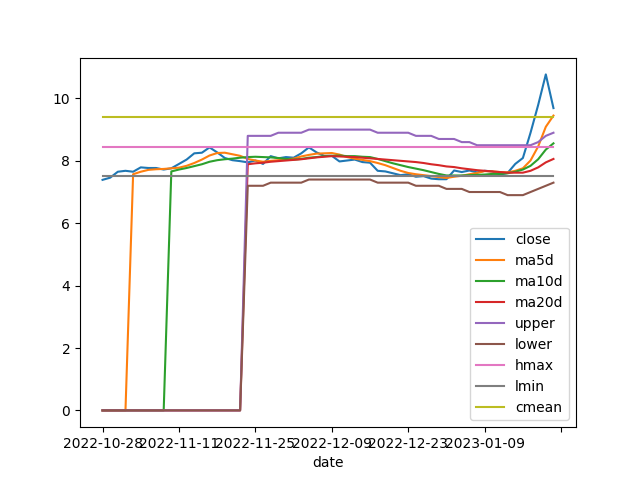

In [82]:

tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# cname = tdd.get_sina_data_code(code)
# plt.title(
#     stock_code + " | " + cname + " | " + str(quotes.index[-1])[: 10],
#     fontsize=14)
tdf.loc[:, ["close", "ma5d", "ma10d", "ma20d",
            "upper", "lower", "hmax", 'lmin', 'cmean']].plot()

In [83]:
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2023-01-20,0.9,1.1,1.1,1.1,1.1,1.1,1.0,0.9,1.0


In [84]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2023-01-20,-10.0,10.0,10.0,10.0,2.4,3.8,0.7,-1.3,-0.3
